In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [159]:
import torch
import torch.nn as nn

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# Hyerparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 50
batch_size = 100
learning_rate = 0.001


In [160]:
train_dataset = dsets.MNIST(root='../data/', train=True, transform=transforms.ToTensor(), download=True)

test_datasest = dsets.MNIST(root='../data/', train=False, transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_datasest, batch_size=batch_size, shuffle=False)


In [161]:
print(len(train_dataset))
print(len(test_datasest))
print(len(train_loader))
print(len(test_loader))


60000
10000
600
100


In [162]:
image, label = iter(train_loader).next()
print(type(image))
print(type(label))
print(image.size())
print(label.size())


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


(-0.5, 145.5, 145.5, -0.5)

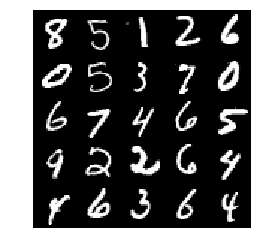

In [163]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    # [c, h, w] => [h, w, c]
    plt.imshow(np.transpose(npimg, (1,2,0)))

images, labels = iter(train_loader).next()
images, labels = images[:25], labels[:25]
imshow(torchvision.utils.make_grid(images, nrow=5, padding=1))
plt.axis('off')


In [164]:
class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # print( 'MLP input_size:' ,x.size())
        out = self.fc1(x)
        # print('MLP fc1 output size: ', out.size())
        out = self.relu(out)
        # print('MLP relu output size: ', out.size())
        out = self.fc2(out)
        # print('MLP fc2 output size: ', out.size())
        return out

model = MultiLayerPerceptron(input_size, hidden_size, num_classes)


In [165]:
image, label = iter(train_loader).next()
print("before view: ", image.size())
image = image.view(-1, 28*28) #reshape的な関数
print("after view: ", image.size())
output = model(image)
print(output.size())


before view:  torch.Size([100, 1, 28, 28])
after view:  torch.Size([100, 784])
torch.Size([100, 10])


In [166]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [167]:
def train(train_loader):
    model.train()
    running_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    
    train_loss = running_loss / len(train_loader)

    return train_loss

def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0

    #  評価時に勾配は不要なのでno_grad()
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            images = images.view(-1, 28*28)

            outputs = model(images)
            
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
        val_loss = running_loss / len(test_loader)
        val_acc = float(correct) / total
        return val_loss, val_acc

loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)

    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f' % (epoch, loss, val_loss, val_acc))

    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)


epoch 0, loss: 2.2369 val_loss: 2.1578 val_acc: 0.5860
epoch 1, loss: 2.0812 val_loss: 1.9883 val_acc: 0.7019
epoch 2, loss: 1.9005 val_loss: 1.7893 val_acc: 0.7311
epoch 3, loss: 1.6946 val_loss: 1.5718 val_acc: 0.7573
epoch 4, loss: 1.4822 val_loss: 1.3612 val_acc: 0.7813
epoch 5, loss: 1.2878 val_loss: 1.1794 val_acc: 0.8015
epoch 6, loss: 1.1260 val_loss: 1.0339 val_acc: 0.8160
epoch 7, loss: 0.9983 val_loss: 0.9208 val_acc: 0.8289
epoch 8, loss: 0.8991 val_loss: 0.8333 val_acc: 0.8368
epoch 9, loss: 0.8217 val_loss: 0.7647 val_acc: 0.8445
epoch 10, loss: 0.7603 val_loss: 0.7099 val_acc: 0.8517
epoch 11, loss: 0.7108 val_loss: 0.6654 val_acc: 0.8565
epoch 12, loss: 0.6703 val_loss: 0.6286 val_acc: 0.8600
epoch 13, loss: 0.6364 val_loss: 0.5979 val_acc: 0.8629
epoch 14, loss: 0.6077 val_loss: 0.5714 val_acc: 0.8664
epoch 15, loss: 0.5831 val_loss: 0.5488 val_acc: 0.8696
epoch 16, loss: 0.5618 val_loss: 0.5291 val_acc: 0.8738
epoch 17, loss: 0.5431 val_loss: 0.5119 val_acc: 0.8756
ep

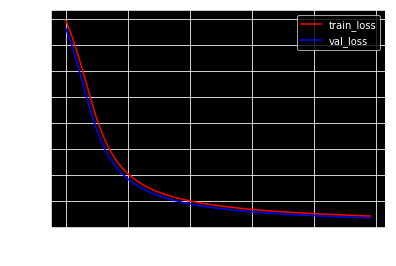

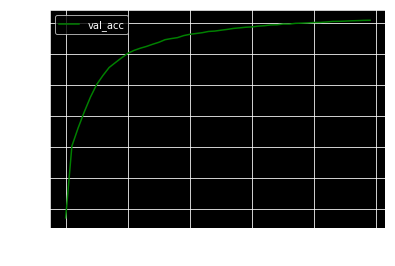

In [168]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.grid()